# Arbol de Decision de Clasificacion

Para consultar la documentacion: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## 1.- Importando paquetes y el conjunto de datos

In [1]:
names = ['response','age','sex','on_thyroxine','query_on_thyroxine','antithyroid_medication','thyroid_surgery',
         'query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured',
         'TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured','T4U','FTI_measured','FTI','TBG_measured','TBG']

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Nombres de Columnas
names = ['response','age','sex','on_thyroxine','query_on_thyroxine','antithyroid_medication','thyroid_surgery',
         'query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured',
         'TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured','T4U','FTI_measured','FTI','TBG_measured','TBG']

df = pd.read_csv('https://raw.githubusercontent.com/aurea-soriano/ML-Datasets/master/hypothyroid.csv', index_col=False, names = names, na_values=['?'])
columnas = ['age','sex','on_thyroxine','antithyroid_medication','thyroid_surgery','pregnant',
            'sick','tumor','lithium','goitre','TSH','T3','TT4','T4U','FTI','response']
df = df[columnas]
df.dropna(inplace=True)
df.head()

,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,response
0,72.0,M,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0,hypothyroid
1,15.0,F,t,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0,hypothyroid
2,24.0,M,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0,hypothyroid
3,24.0,F,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0,hypothyroid
4,77.0,M,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0,hypothyroid


## 2.- Exploracion y Preprocesamiento de los Datos

**El método 'info()'los tipos y números de datos**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 3162
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     2000 non-null   float64
 1   sex                     2000 non-null   object 
 2   on_thyroxine            2000 non-null   object 
 3   antithyroid_medication  2000 non-null   object 
 4   thyroid_surgery         2000 non-null   object 
 5   pregnant                2000 non-null   object 
 6   sick                    2000 non-null   object 
 7   tumor                   2000 non-null   object 
 8   lithium                 2000 non-null   object 
 9   goitre                  2000 non-null   object 
 10  TSH                     2000 non-null   float64
 11  T3                      2000 non-null   float64
 12  TT4                     2000 non-null   float64
 13  T4U                     2000 non-null   float64
 14  FTI                     2000 non-null   

**El método 'describe()' obtiene un resumen de estadísticas de las características del conjunto de datos**

In [4]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,age,TSH,T3,TT4,T4U,FTI
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,53.622500,6.092235,1.924900,107.364650,0.988040,110.118150
std,19.302572,24.542970,0.970525,45.047061,0.231548,41.103306
min,1.000000,0.000000,0.050000,2.000000,0.000000,0.000000
10%,27.000000,0.000000,0.900000,62.000000,0.750000,68.000000
25%,37.000000,0.000000,1.300000,82.000000,0.850000,90.000000
50%,57.000000,0.700000,1.800000,103.000000,0.960000,107.000000
75%,70.000000,2.300000,2.300000,126.000000,1.070000,127.000000
90%,77.000000,9.610000,3.000000,160.100000,1.240000,159.000000
max,98.000000,530.000000,9.800000,450.000000,2.030000,450.000000


### 2.1.- Exploracion Grafica

**Ejecutamos un bucle 'for' para dibujar boxlots de todas las características para la CLASE OBJETIVO '0' y '1'**

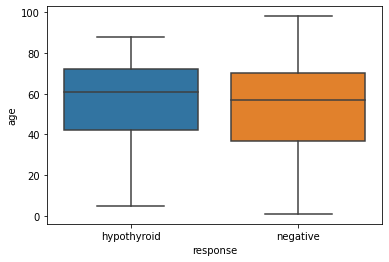

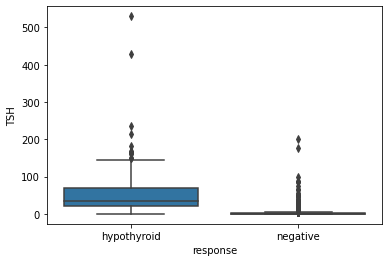

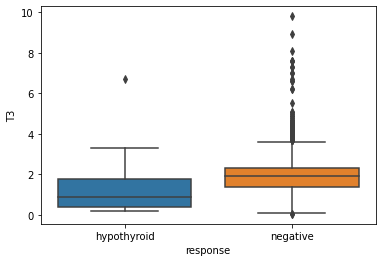

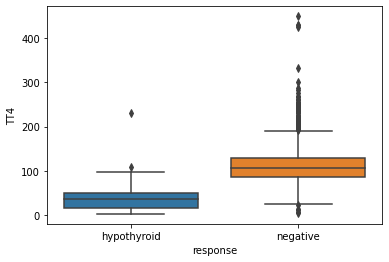

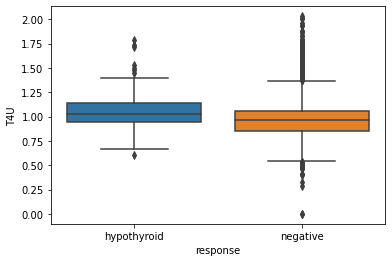

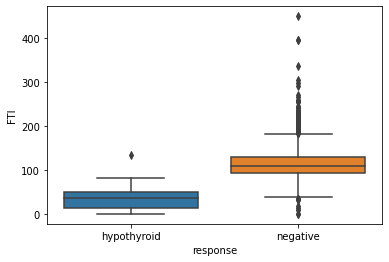

In [5]:
for columna in ['age','TSH','T3','TT4','T4U','FTI']:
  sns.boxplot(x='response', y=columna, data=df)
  plt.show()

### 2.2.- Preprocesamiento

In [6]:
#Modificamos la Variable respuesta
df.loc[df['response'] == 'hypothyroid', 'response'] = 1
df.loc[df['response'] == 'negative', 'response'] = 0
#Modificamos la Variable "sex"
df.loc[df['sex'] == 'M', 'sex'] = 1
df.loc[df['sex'] == 'F', 'sex'] = 0
#Modificamos las pruebas
for columna in ['on_thyroxine','antithyroid_medication','thyroid_surgery','pregnant','sick','tumor','lithium','goitre']:
  df.loc[df[columna] == 't', columna] = 1
  df.loc[df[columna] == 'f', columna] = 0
df.head()

,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,response
0,72.0,1,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0,1
1,15.0,0,1,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0,1
2,24.0,1,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0,1
3,24.0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0,1
4,77.0,1,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0,1


## 3.- Modelado

**Empezaremos Definiendo nuestras variables predictoras y nuestra variable respuesta**

In [7]:
# Definimos la variable respuesta y la variable predictora
target = 'response'
predictoras = ['age','sex','on_thyroxine','antithyroid_medication','thyroid_surgery','pregnant',
               'sick','tumor','lithium','goitre','TSH','T3','TT4','T4U','FTI']

In [8]:
# Obtenemos del dataframe el conjunto de datos
X = df[predictoras]
y = df[target].astype('int')
#Visualizamos las variables predictoras
print('\n\nVisualizamos la variable predictora/independiente (X)')
display(X)
print('\n\nVisualizamos la variable respuesta/dependiente (Y)')
y



Visualizamos la variable predictora/independiente (X)


,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,72.0,1,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,15.0,0,1,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,24.0,1,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,24.0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,77.0,1,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58.0,0,0,0,0,0,0,0,0,0,5.8,1.7,86.0,0.91,95.0
3159,29.0,0,0,0,0,0,0,0,0,0,0.8,1.8,99.0,1.01,98.0
3160,77.0,1,0,0,0,0,0,0,0,0,1.2,0.6,71.0,0.68,104.0
3161,74.0,0,0,0,0,0,0,0,0,0,1.3,0.1,65.0,0.48,137.0




Visualizamos la variable respuesta/dependiente (Y)


0       1
1       1
2       1
3       1
4       1
       ..
3158    0
3159    0
3160    0
3161    0
3162    0
Name: response, Length: 2000, dtype: int64

In [9]:
# Generamos el conjunto de train y test gracias a sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [11]:
#Revisamos los tamaños de las pruebas de train y test
print("Tamaño del conjunto de datos Inicial:", df.shape)
print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de datos Inicial: (2000, 16)
Tamaño del conjunto de características del entrenamiento: (1400, 15)
Tamaño del conjunto de características de prueba: (600, 15)
Tamaño de la variable objetivo del entrenamiento: (1400,)
Tamaño de la variable objetivo de prueba: (600,)


### 3.1.- Arbol de Decision

In [12]:
# Importamos el Modelo del Arbol de Regresión y metodo para graficar
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Importamos las metricas de la regresion
from sklearn import metrics
# Creamos el modelo de Arbol de Decision de Regresion
tree_model = DecisionTreeClassifier(random_state=123)

In [13]:
# Entrenamiento del modelo
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [14]:
# Predecimos la data de entrenamiento y la data del test
train_pred=tree_model.predict(X_train)
test_pred=tree_model.predict(X_test)

In [15]:
#Vemos la matriz de confusion del train y el test
from sklearn.metrics import classification_report, confusion_matrix
print('Visualizando la matriz de confusion del train:\n')
print(confusion_matrix(y_train, train_pred))
print('\nVisualizando la matriz de confusion del test:\n')
print(confusion_matrix(y_test, test_pred))

Visualizando la matriz de confusion del train:

[[1318    0]
 [   1   81]]

Visualizando la matriz de confusion del test:

[[555   5]
 [  3  37]]


In [16]:
# Calculando las principales metricas
print("Calculando el Accuracy o Precision Global del Modelo")
print("Accuracy del Train:", metrics.accuracy_score(y_train,train_pred))
print("Accuracy del Test:", metrics.accuracy_score(y_test,test_pred))
print("\nCalculando la Sensibilidad o Recall")
print("Sensibilidad del Train:", metrics.recall_score(y_train,train_pred))
print("Sensibilidad del Test:", metrics.recall_score(y_test,test_pred))
print("\nCalculando la Precision del Modelo")
print("Precision del Train:", metrics.precision_score(y_train,train_pred))
print("Precision del Test:", metrics.precision_score(y_test,test_pred))

Calculando el Accuracy o Precision Global del Modelo
Accuracy del Train: 0.9992857142857143
Accuracy del Test: 0.9866666666666667

Calculando la Sensibilidad o Recall
Sensibilidad del Train: 0.9878048780487805
Sensibilidad del Test: 0.925

Calculando la Precision del Modelo
Precision del Train: 1.0
Precision del Test: 0.8809523809523809


### 3.2.- Mejor Modelo Con GreadSearch

In [17]:
#Importamos el método GridSearch
from sklearn.model_selection import GridSearchCV
#Definimos los parametos del Gread Search
params = {'max_depth':list(range(2,11)),
          'min_samples_leaf':[x / 100 for x in range(1, 11)]}
#Creamos el Objeto gread search
grid = GridSearchCV(tree_model, param_grid=params, scoring='accuracy', verbose=1, return_train_score=True)

In [18]:
#Entrenando con GridSearch
grid.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    3.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=123,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        

In [19]:
#Obtenemos el mejor estimador
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.01, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [20]:
#Probamos el mejor estimador
tree_model = DecisionTreeClassifier(max_depth= 2, min_samples_leaf = 0.01, random_state=123)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.01, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [21]:
# Predecimos la data de entrenamiento y la data del test
train_pred=tree_model.predict(X_train)
test_pred=tree_model.predict(X_test)

In [22]:
# Calculando las principales metricas
print("Calculando el Accuracy o Precision Global del Modelo")
print("Accuracy del Train:", metrics.accuracy_score(y_train,train_pred))
print("Accuracy del Test:", metrics.accuracy_score(y_test,test_pred))
print("\nCalculando la Sensibilidad o Recall")
print("Sensibilidad del Train:", metrics.recall_score(y_train,train_pred))
print("Sensibilidad del Test:", metrics.recall_score(y_test,test_pred))
print("\nCalculando la Precision del Modelo")
print("Precision del Train:", metrics.precision_score(y_train,train_pred))
print("Precision del Test:", metrics.precision_score(y_test,test_pred))

Calculando el Accuracy o Precision Global del Modelo
Accuracy del Train: 0.9878571428571429
Accuracy del Test: 0.99

Calculando la Sensibilidad o Recall
Sensibilidad del Train: 0.8902439024390244
Sensibilidad del Test: 0.925

Calculando la Precision del Modelo
Precision del Train: 0.9012345679012346
Precision del Test: 0.925


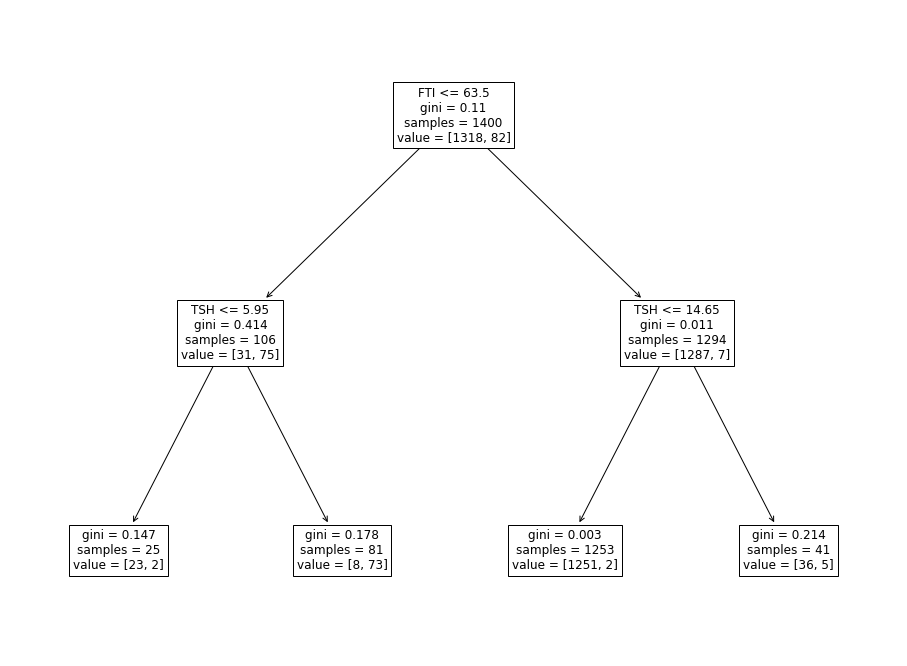

In [23]:
#Graficando el Arbol
fig, ax = plt.subplots(figsize=(16, 12))
plot_tree(tree_model, feature_names = X_train.columns, fontsize=12)
plt.show()  